In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv("../project1/newdf.csv")


In [2]:
'''
    Hypothesis
    - People die more nowadays by shark attacks than before?
    - In the city with the most attacks, was the majority of the attacks provoked by humans?
    - Is there a day of the week with the more attacks?
    - If you are attacked by a specific species, do you have a higher chance of a fatal outcome? 
'''   

'\n    Hypothesis\n    - People die more nowadays by shark attacks than before?\n    - In the city with the most attacks, was the majority of the attacks provoked by humans?\n    - Is there a day of the week with the more attacks?\n    - If you are attacked by a specific species, do you have a higher chance of a fatal outcome? \n'

([<matplotlib.axis.XTick at 0x15fc9142000>,
 [Text(1880, 0, '1880'),
  Text(1900, 0, '1900'),
  Text(1920, 0, '1920'),
  Text(1940, 0, '1940'),
  Text(1960, 0, '1960'),
  Text(1980, 0, '1980'),
  Text(2000, 0, '2000'),
  Text(2020, 0, '2020'),
  Text(2040, 0, '2040')])

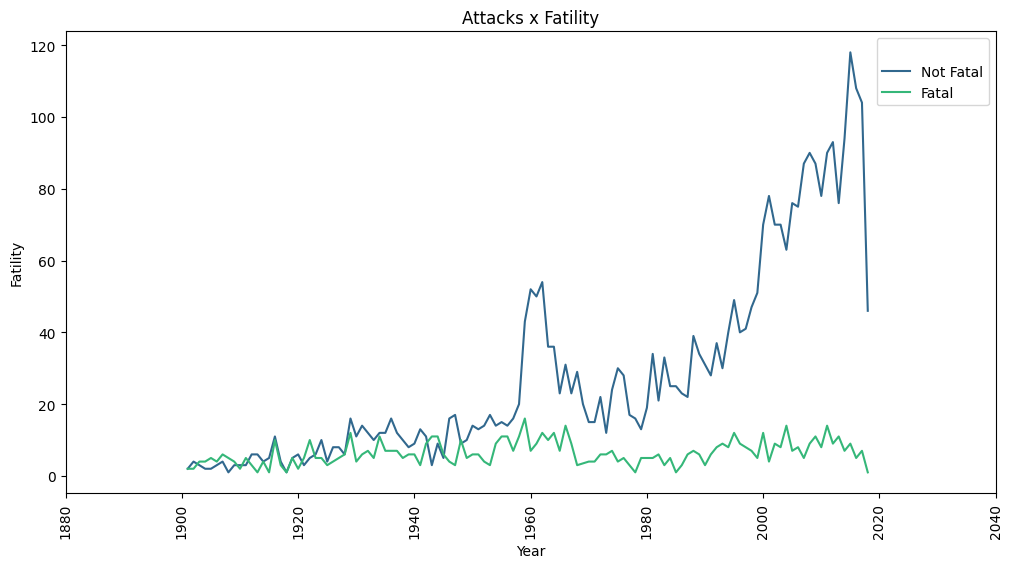

In [3]:
# People die more today by shark attacks than before?

# Creating a new subset grouping by the Fatal and Year
fatal = df[df['fatal_clean'] != 'Unknown']
fatal_group = (fatal.groupby(["fatal_clean", "year"])).count().reset_index()

# Ploting the graphic - divided per Fatility
plt.figure(figsize=(12, 6))
sns.lineplot( data = fatal_group.query( "year > 1900").rename({'fatal_clean':' '}, axis = 1).replace({'Y':'Fatal',
                                                               "N":'Not Fatal'}),
             x = "year",
             y = "date",
             palette='viridis',
             hue = " ")

plt.title('Attacks x Fatility')
plt.xlabel('Year')
plt.ylabel('Fatility')
plt.xticks(rotation=90)
plt.xticks([int(year) for year in plt.xticks()[0]])

#plt.legend(labels=["Not Fatal", "Fatal"])


In [4]:

# Filter out 'Unknown' fatal values
fatal = df[df['fatal_clean'] != 'Unknown']

# Group by 50-year intervals and calculate counts
yearly_counts = (
    fatal[fatal['year'] >= 1900]
    .groupby(pd.cut(fatal['year'], bins=range(1900, 2018, 10), right=False))
    .agg(total=('year', 'size'), fatal=('fatal_clean', lambda x: (x == 'Y').sum()))
)

# Calculate non-fatal counts
yearly_counts['non_fatal'] = yearly_counts['total'] - yearly_counts['fatal']

# Calculate the percentage of fatal attacks
yearly_counts['percentage_fatal'] = (yearly_counts['fatal'] / yearly_counts['total']) * 100

yearly_counts


C:\Users\anafl\AppData\Local\Temp\ipykernel_24908\53203507.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(pd.cut(fatal['year'], bins=range(1900, 2018, 10), right=False))


,total,fatal,non_fatal,percentage_fatal
year,,,,
"[1900, 1910)",63,39,24,61.904762
"[1910, 1920)",83,35,48,42.168675
"[1920, 1930)",129,57,72,44.186047
"[1930, 1940)",182,65,117,35.714286
"[1940, 1950)",170,68,102,40.000000
"[1950, 1960)",264,84,180,31.818182
"[1960, 1970)",437,83,354,18.993135
"[1970, 1980)",237,45,192,18.987342
"[1980, 1990)",322,47,275,14.596273


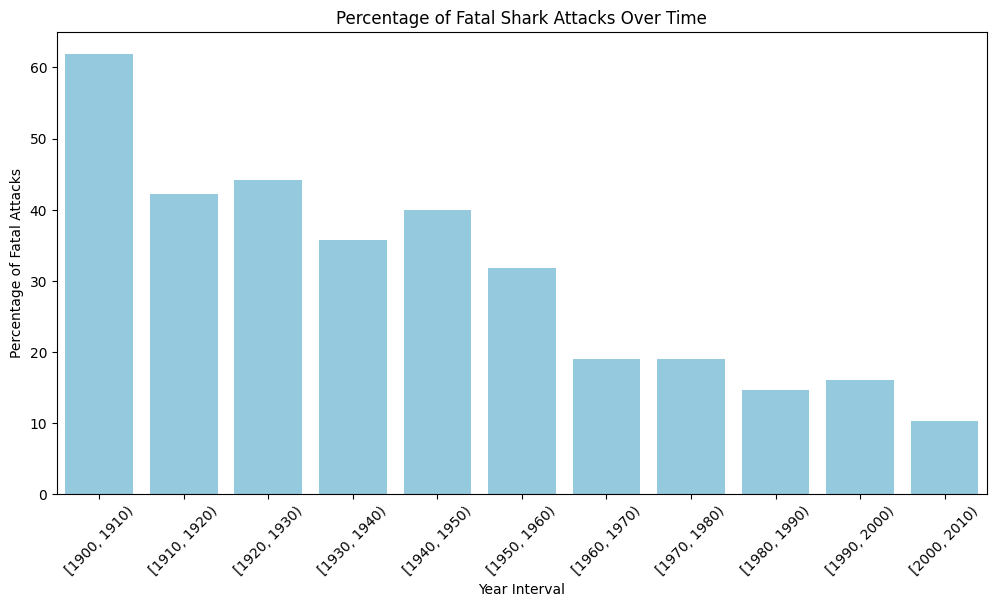

In [5]:
# Ploting the graphic for more visualization about the percentage decrease in fatal attacks
plt.figure(figsize=(12, 6))
sns.barplot(x=yearly_counts.index, y='percentage_fatal', data=yearly_counts, color='skyblue')

# Set the labels and title
plt.xlabel('Year Interval')
plt.ylabel('Percentage of Fatal Attacks')
plt.title('Percentage of Fatal Shark Attacks Over Time')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

C:\Users\anafl\AppData\Local\Temp\ipykernel_24908\2806046728.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["type"] = filtered["type"].where(filtered["type"].isin(type_3),


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'USA'),
  Text(1, 0, 'AUSTRALIA'),
  Text(2, 0, 'MEXICO'),
  Text(3, 0, 'BRAZIL'),
  Text(4, 0, 'SOUTH AFRICA'),
  Text(5, 0, 'BAHAMAS'),
  Text(6, 0, 'NEW ZEALAND'),
  Text(7, 0, 'REUNION'),
  Text(8, 0, 'PHILIPPINES'),
  Text(9, 0, 'PAPUA NEW GUINEA')])

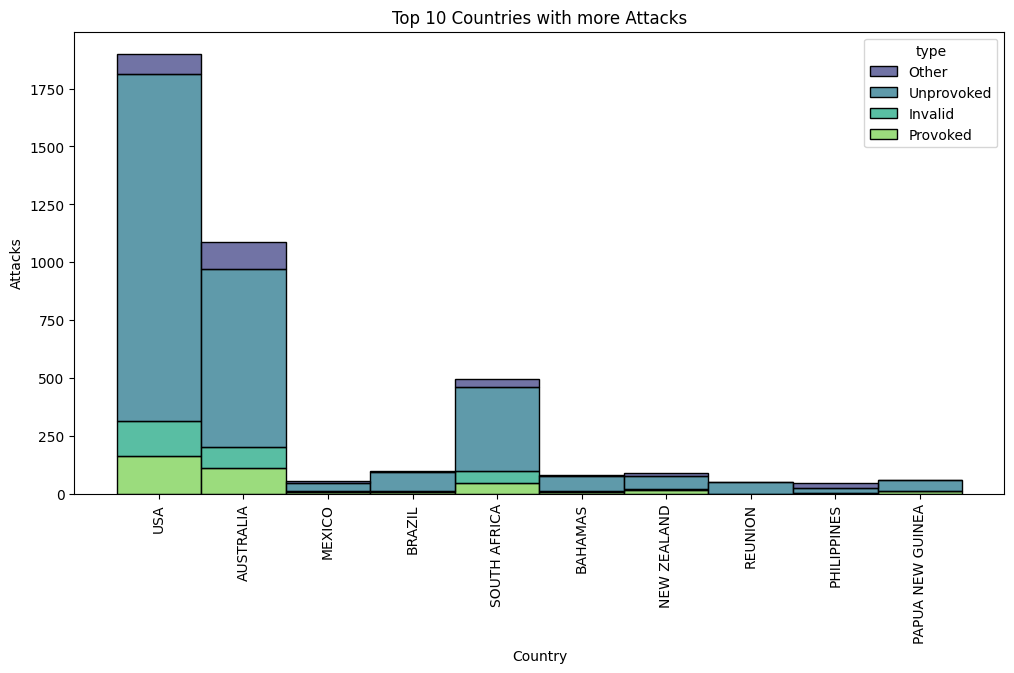

In [6]:
# In the city with the most attacks, was the majority of the attacks provoked by humans?


area = df["country"].value_counts(dropna=False)# creating a subset that the Country and the total of Attacks 
area_10 = area.index[:10].values # getting just the first top 10 
filtered = df.query("country in @area_10") 



type = df["type"].value_counts(dropna=False) 
type_3 = type.index[:3].values # just getting the top 3 types

# replacing with 'Other' the type that are not in the top 3
filtered["type"] = filtered["type"].where(filtered["type"].isin(type_3), 
                    "Other") 

# ploting the graphic
plt.figure(figsize=(12, 6))
sns.histplot(data = filtered,
            x = "country", hue="type", 
            multiple="stack", palette='viridis')

plt.title('Top 10 Countries with more Attacks')
plt.xlabel('Country')
plt.ylabel('Attacks')
plt.xticks(rotation=90)


([<matplotlib.axis.XTick at 0x15fcb30c2f0>,
 [Text(2000, 0, '2000'),
  Text(2002, 0, '2002'),
  Text(2005, 0, '2005'),
  Text(2007, 0, '2007'),
  Text(2010, 0, '2010'),
  Text(2012, 0, '2012'),
  Text(2015, 0, '2015'),
  Text(2017, 0, '2017'),
  Text(2020, 0, '2020')])

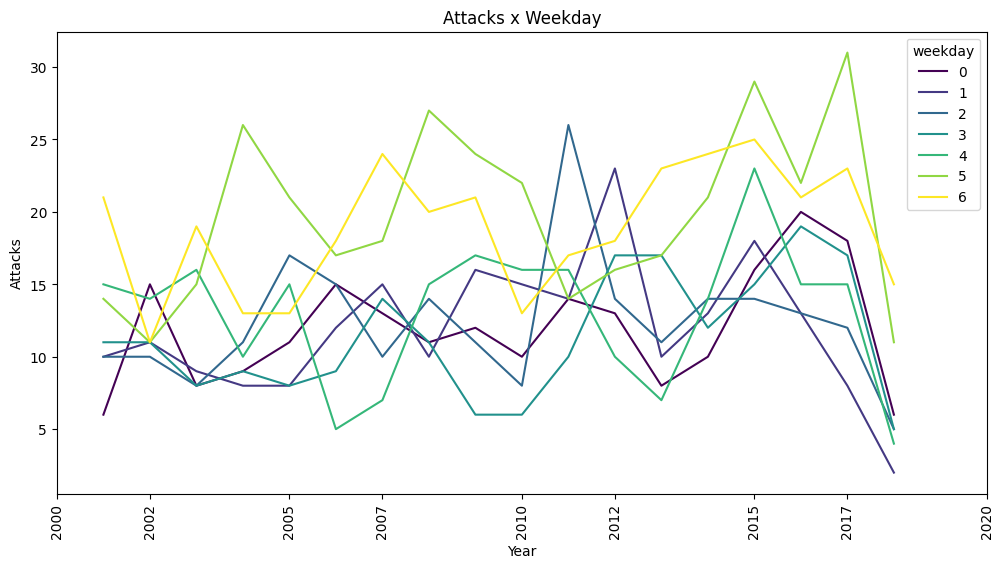

In [7]:
# Is there a day of the week with the more attacks?
# Weekday vs Attacks

# Creating a new subset grouping by the Weekday and Year
date_group = df.groupby(["weekday", "year"]).count().reset_index()

# Ploting the graphic - divided per Weekday
plt.figure(figsize=(12, 6))
sns.lineplot( data = date_group.query( "year > 2000"),
             x = "year",
             y = "date",
             palette='viridis',
             hue = "weekday")

plt.title('Attacks x Weekday')
plt.xlabel('Year')
plt.ylabel('Attacks')
plt.xticks(rotation=90)
plt.xticks([int(year) for year in plt.xticks()[0]])

In [8]:
df["species_clean"].value_counts()

species_clean
Unknown        3805
White shark     555
Tiger shark     231
Bull shark      146
Name: count, dtype: int64

Text(0.5, 1.0, 'Attacks vs Species')

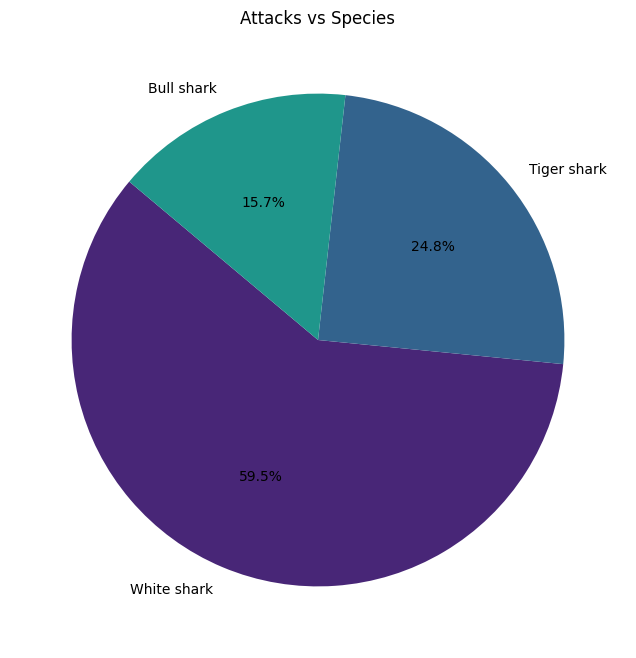

In [9]:
# If you are attacked by a specific species, do you have a higher chance of a fatal outcome?

df["species_clean"].value_counts()

species = df[df["species_clean"] != 'Unknown']
species["species_clean"].value_counts()

# 3. Create a pie chart
colors = ['#482677FF', '#33638DFF',  '#1F968BFF', '#55C667FF']
plt.figure(figsize=(14, 8))
plt.pie((species["species_clean"].value_counts()).values, 
        labels = (species["species_clean"].value_counts()).index,
        autopct='%1.1f%%', startangle=140,
        colors=colors)
plt.title('Attacks vs Species')

In [10]:
# Table with the info describing the Specie and the Fatality

# Create a contingency table
contingency_table = pd.crosstab(df['species_clean'], df['fatal_clean'], margins=True, margins_name='Total')

# Rename the columns for clarity
contingency_table = contingency_table.rename(columns={'Y': 'Fatal', 'N': 'Not Fatal', 'Unknown': 'Unknown'})

contingency_table['Percentage Fatal'] = (contingency_table['Fatal'] / contingency_table['Total']) * 100

# Print the resulting table
contingency_table

fatal_clean,Not Fatal,Unknown,Fatal,Total,Percentage Fatal
species_clean,,,,,
Bull shark,117,0,29,146,19.863014
Tiger shark,173,2,56,231,24.242424
Unknown,2719,420,666,3805,17.503285
White shark,415,7,133,555,23.963964
Total,3424,429,884,4737,18.661600
